In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# data = pd.read_csv("data.csv")
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA 441/Final/Rdata5yrs.csv")

In [ ]:
LR = LinearRegression()

In [6]:
Y = data["positionOrder"]
X = data[["circuitID", "Weather", "driverId", "constructorId", "quali_ position"]]

In [ ]:
data

,resultId,circuitID,Weather,raceId,driverId,constructorId,positionOrder,laps,pit_id,pit stops duration,# of pitstops,quali_ position
0,23782.0,1.0,0.0,989.0,20.0,6.0,1.0,58.0,989-20,21.787,1.0,3.0
1,23783.0,1.0,0.0,989.0,1.0,131.0,2.0,58.0,989-1,21.821,1.0,1.0
2,23784.0,1.0,0.0,989.0,8.0,6.0,3.0,58.0,989-8,21.421,1.0,2.0
3,23785.0,1.0,0.0,989.0,817.0,9.0,4.0,58.0,989-817,21.440,1.0,5.0
4,23786.0,1.0,0.0,989.0,4.0,1.0,5.0,58.0,989-4,22.573,1.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2295,26081.0,13.0,1.0,1110.0,817.0,213.0,16.0,44.0,1110-817,22.843,3.0,19.0
2296,26082.0,13.0,1.0,1110.0,858.0,3.0,17.0,44.0,1110-858,23.570,2.0,18.0
2297,26083.0,13.0,1.0,1110.0,807.0,210.0,18.0,44.0,1110-807,24.571,1.0,20.0
2298,26084.0,13.0,1.0,1110.0,832.0,6.0,19.0,23.0,1110-832,23.303,0.0,5.0


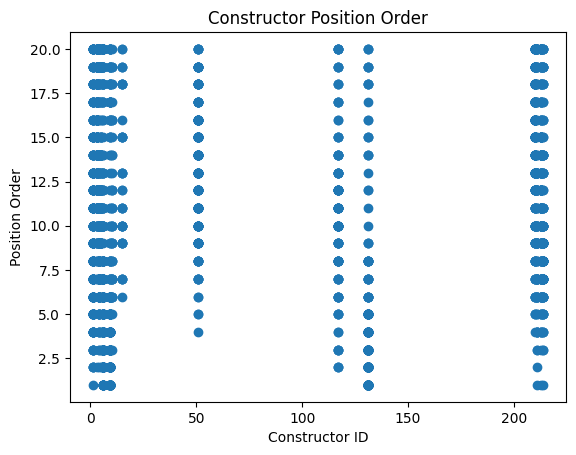

In [ ]:
plt.scatter(data["constructorId"], data["positionOrder"])
plt.xlabel("Constructor ID")
plt.ylabel("Position Order")
plt.title("Constructor Position Order")
plt.show()

In [7]:
dataclean = data.dropna()

In [8]:
Y = dataclean["positionOrder"]
X = dataclean[["circuitID", "Weather", "driverId", "constructorId", "quali_ position"]]

In [ ]:
reg = LR.fit(X, Y)

In [ ]:
reg.score(X, Y)

0.38511477370141767

In [ ]:
N = len(X)
p = len(X.columns) + 1  # plus one because LinearRegression adds an intercept term

X_with_intercept = np.empty(shape=(N, p), dtype=float)
X_with_intercept[:, 0] = 1
X_with_intercept[:, 1:p] = X.values

beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ Y.values
print(beta_hat)

[ 3.13026452e+00 -5.75044006e-04 -7.22220054e-02  1.14115650e-03
  3.66106068e-03  6.03589115e-01]


In [ ]:
y_hat = reg.predict(X)
residuals = Y.values - y_hat
residual_sum_of_squares = residuals.T @ residuals
print(residual_sum_of_squares)
sigma_squared_hat = residual_sum_of_squares[0] / (N - p)
var_beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) * sigma_squared_hat
for p_ in range(p):
    tandard_error = var_beta_hat[p_, p_] ** 0.5
    print(f"SE(beta_hat[{p_}]): {standard_error}")

46934.23054771771


IndexError: invalid index to scalar variable.

In [ ]:
import statsmodels.api as sm
ols = sm.OLS(Y.values, X_with_intercept)
ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     287.0
Date:                Fri, 10 May 2024   Prob (F-statistic):          8.10e-239
Time:                        23:50:19   Log-Likelihood:                -6724.5
No. Observations:                2297   AIC:                         1.346e+04
Df Residuals:                    2291   BIC:                         1.350e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1303      0.303     10.348      0.000       2.537       3.723
x1            -0.0006      0.004     -0.162      0.871      -0.008       0.006
x2            -0.0722      0.279     -0.259      0.796      -0.619       0.475
x3             0.0011      0.000      3.825      0.000       0.001       0.002
x4             0.0037      0.001      3.323      0.001       0.002       0.006
x5             0.6036      0.017     36.370      0.000       0.571       0.636
==============================================================================
Omnibus:                      237.441   Durbin-Watson:                   1.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              317.530
Skew:                           0.844   Prob(JB):                     1.12e-69
Kurtosis:                       3.683   Cond. No.                     2.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(array([  6.,  26., 124., 719., 603., 406., 193., 113.,  81.,  26.]),
 array([-14.06910612, -11.09645093,  -8.12379574,  -5.15114055,
         -2.17848536,   0.79416983,   3.76682503,   6.73948022,
          9.71213541,  12.6847906 ,  15.65744579]),
 <BarContainer object of 10 artists>)

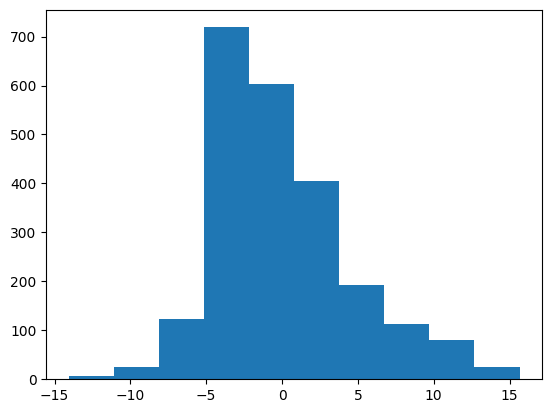

In [ ]:
import matplotlib.pyplot as plt

plt.hist(residuals)

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(interaction_only = False, include_bias = False)
X = poly.fit_transform(X)

In [ ]:
reg = LR.fit(X, Y)

In [ ]:
reg.score(X, Y)

0.4033935046837256

In [ ]:
N = len(X)
p = len(pd.DataFrame(X).columns) + 1  # plus one because LinearRegression adds an intercept term

X_with_intercept = np.empty(shape=(N, p), dtype=float)
X_with_intercept[:, 0] = 1
X_with_intercept[:, 1:p] = pd.DataFrame(X).values

#beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ Y.values
#print(beta_hat)

# Categorical Neural Network

In [9]:
!pip install tensorflow

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(12, activation='relu'),
    Dense(22, activation='relu'),
    Dense(34, activation='relu'),
    Dense(52, activation='relu'),
    Dense(82, activation='relu'),
    Dense(16, activation='relu'),
    Dense(21, activation='softmax')
])

optimizer = Adam(learning_rate=0.002)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32,
                    validation_split=0.15, callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy}')

Epoch 1/50
49/49 [==============================] - 3s 10ms/step - loss: 3.0388 - accuracy: 0.0525 - val_loss: 3.0249 - val_accuracy: 0.0797
Epoch 2/50
49/49 [==============================] - 0s 4ms/step - loss: 2.9718 - accuracy: 0.0762 - val_loss: 2.8949 - val_accuracy: 0.0906
Epoch 3/50
49/49 [==============================] - 0s 4ms/step - loss: 2.8353 - accuracy: 0.0999 - val_loss: 2.7749 - val_accuracy: 0.0797
Epoch 4/50
49/49 [==============================] - 0s 4ms/step - loss: 2.7406 - accuracy: 0.0935 - val_loss: 2.7571 - val_accuracy: 0.0906
Epoch 5/50
49/49 [==============================] - 0s 3ms/step - loss: 2.7241 - accuracy: 0.0999 - val_loss: 2.7363 - val_accuracy: 0.1051
Epoch 6/50
49/49 [==============================] - 0s 6ms/step - loss: 2.7110 - accuracy: 0.1089 - val_loss: 2.7178 - val_accuracy: 0.1051
Epoch 7/50
49/49 [==============================] - 0s 6ms/step - loss: 2.7051 - accuracy: 0.1102 - val_loss: 2.6866 - val_accuracy: 0.1087
Epoch 8/50
49/49 [=

# Regression Neural Network

In [ ]:
model_regression = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

optimizer = Adam(learning_rate=0.001)
model_regression.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_regression.fit(X_train_scaled, y_train, epochs=35, batch_size=32,
                    validation_split=0.2, callbacks=[early_stopping])

loss, mae = model_regression.evaluate(X_test_scaled, y_test)
print(f'Test Mean Absolute Error: {mae}')

Epoch 1/35
46/46 [==============================] - 2s 18ms/step - loss: 69.6564 - mean_absolute_error: 6.6863 - val_loss: 22.2884 - val_mean_absolute_error: 3.8094
Epoch 2/35
46/46 [==============================] - 0s 5ms/step - loss: 25.6202 - mean_absolute_error: 4.0453 - val_loss: 21.0775 - val_mean_absolute_error: 3.5392
Epoch 3/35
46/46 [==============================] - 0s 4ms/step - loss: 24.7666 - mean_absolute_error: 3.8991 - val_loss: 20.2931 - val_mean_absolute_error: 3.5081
Epoch 4/35
46/46 [==============================] - 0s 4ms/step - loss: 23.6175 - mean_absolute_error: 3.8513 - val_loss: 20.6127 - val_mean_absolute_error: 3.4763
Epoch 5/35
46/46 [==============================] - 0s 3ms/step - loss: 23.6804 - mean_absolute_error: 3.8387 - val_loss: 21.8320 - val_mean_absolute_error: 3.4505
Epoch 6/35
46/46 [==============================] - 0s 3ms/step - loss: 23.4847 - mean_absolute_error: 3.7763 - val_loss: 19.8188 - val_mean_absolute_error: 3.4723
Epoch 7/35
46/4

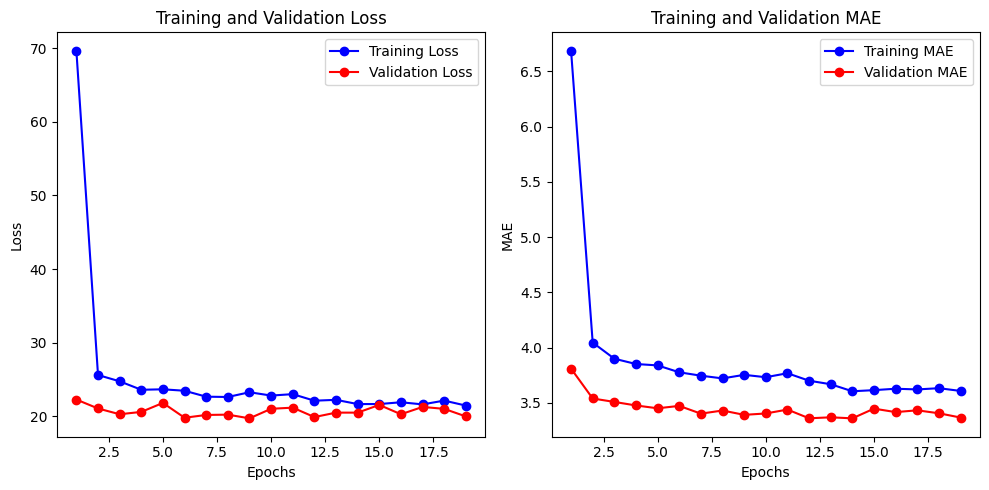

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, mae, 'bo-', label='Training MAE')
plt.plot(epochs, val_mae, 'ro-', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

#Regression Convolutional Neural Network

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

model_CNN = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=1),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.45),
    Dense(128, activation='relu'),
    Dropout(0.45),
    Dense(1, activation='linear')
])

optimizer = Adam(learning_rate=0.001)
model_CNN.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history = model_CNN.fit(X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1), y_train, epochs=100, batch_size=32,
                    validation_split=0.2, callbacks=[early_stopping])

loss, mae = model_CNN.evaluate(X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1), y_test)
print(f'Test Mean Absolute Error: {mae}')

Epoch 1/100
46/46 [==============================] - 3s 19ms/step - loss: 74.6871 - mean_absolute_error: 7.0487 - val_loss: 34.5283 - val_mean_absolute_error: 4.9421
Epoch 2/100
46/46 [==============================] - 0s 10ms/step - loss: 40.5383 - mean_absolute_error: 5.2664 - val_loss: 25.3593 - val_mean_absolute_error: 4.1757
Epoch 3/100
46/46 [==============================] - 0s 10ms/step - loss: 30.1990 - mean_absolute_error: 4.4416 - val_loss: 21.0236 - val_mean_absolute_error: 3.7088
Epoch 4/100
46/46 [==============================] - 0s 8ms/step - loss: 27.3381 - mean_absolute_error: 4.0890 - val_loss: 21.4410 - val_mean_absolute_error: 3.5110
Epoch 5/100
46/46 [==============================] - 1s 19ms/step - loss: 27.2896 - mean_absolute_error: 4.0689 - val_loss: 20.1544 - val_mean_absolute_error: 3.4594
Epoch 6/100
46/46 [==============================] - 1s 15ms/step - loss: 25.6452 - mean_absolute_error: 3.9376 - val_loss: 20.8671 - val_mean_absolute_error: 3.4888
Epoch

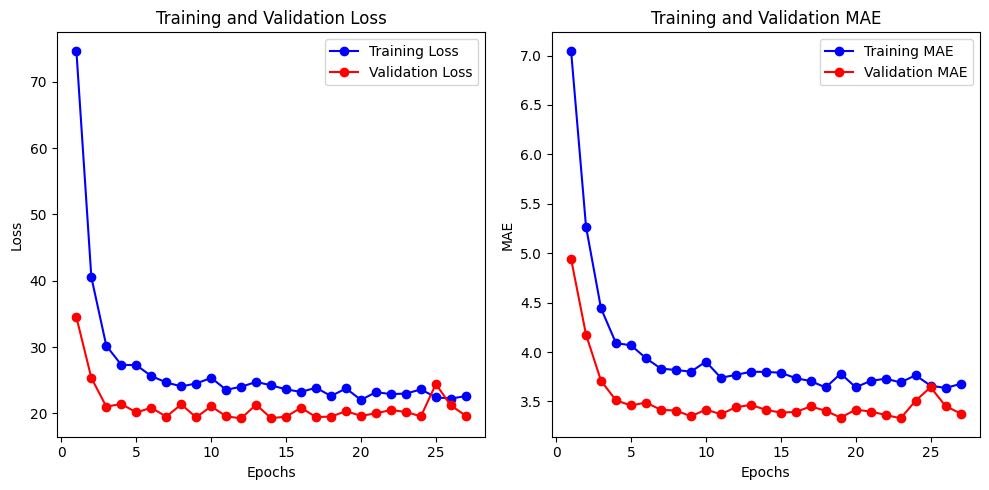

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, mae, 'bo-', label='Training MAE')
plt.plot(epochs, val_mae, 'ro-', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

#Comparing Models

In [ ]:
from sklearn.metrics import mean_absolute_error

print(f'Linear Regression Model - Train MAE: {mean_absolute_error(y_train, reg.predict(X_train_scaled))}')
print(f'Linear Regression Model - Test MAE: {mean_absolute_error(y_test, reg.predict(X_test_scaled))}')

Linear Regression Model - Train MAE: 8.230576412617467
Linear Regression Model - Test MAE: 8.200456882483854


#CORN

In [11]:
!pip install git+https://github.com/ck37/coral-ordinal/

  Cloning https://github.com/ck37/coral-ordinal/ to /tmp/pip-req-build-kwgl9w9c
  Running command git clone --filter=blob:none --quiet https://github.com/ck37/coral-ordinal/ /tmp/pip-req-build-kwgl9w9c
  Resolved https://github.com/ck37/coral-ordinal/ to commit e42038b66705bcd6fb52152cf28ce8278a16912c
  Preparing metadata (setup.py) ... done
  Created wheel for coral-ordinal: filename=coral_ordinal-0.1.9.dev0-py3-none-any.whl size=14591 sha256=419482d46afa07f23c1bf5b7328a8e8633e11fcf61bc7a9a0714ed3ac3f78f43
  Stored in directory: /tmp/pip-ephem-wheel-cache-5ltdeefx/wheels/85/68/e8/f57f5696d75898becfbda71caf87c581d3a44fa4a2280cd45b
Successfully built coral-ordinal


In [12]:
import coral_ordinal as coral

In [13]:
import tensorflow as tf

def corn_loss(y_train, y_pred):
    y_train = tf.cast(y_train, tf.int32)
    num_classes = tf.shape(y_pred)[1]
    # tf.print(y_pred)
    loss = -tf.reduce_sum(tf.one_hot(y_train - 1, num_classes, dtype=tf.float32) * tf.math.log(y_pred + 1e-8))
    return loss

In [14]:
model_regression = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
     Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(9, activation='relu'),
    # ,Dense(21, activation='softmax')
])

optimizer = Adam(learning_rate=0.0012)

# model_regression.compile(optimizer=optimizer, loss=corn_loss, metrics=['mean_absolute_error'])
model_regression.add(coral.CoralOrdinal(num_classes = 21))
model_regression.compile(optimizer=optimizer, loss = coral.OrdinalCrossEntropy(), metrics = [coral.MeanAbsoluteErrorLabels()])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_regression.fit(X_train_scaled, y_train - 1, epochs=50, batch_size=32,
                    validation_split=0.15, callbacks=[early_stopping])

loss, mae = model_regression.evaluate(X_test_scaled, y_test - 1)
print(f'Test Mean Absolute Error: {mae}')

Epoch 1/50
49/49 [==============================] - 4s 22ms/step - loss: 13.1913 - mean_absolute_error_labels: 7.4392 - val_loss: 12.5406 - val_mean_absolute_error_labels: 4.3410
Epoch 2/50
49/49 [==============================] - 0s 9ms/step - loss: 12.4908 - mean_absolute_error_labels: 4.7216 - val_loss: 12.1130 - val_mean_absolute_error_labels: 4.7847
Epoch 3/50
49/49 [==============================] - 0s 7ms/step - loss: 11.9664 - mean_absolute_error_labels: 6.4925 - val_loss: 11.7671 - val_mean_absolute_error_labels: 6.7722
Epoch 4/50
49/49 [==============================] - 0s 6ms/step - loss: 11.6588 - mean_absolute_error_labels: 6.2181 - val_loss: 11.4269 - val_mean_absolute_error_labels: 6.3208
Epoch 5/50
49/49 [==============================] - 1s 11ms/step - loss: 11.3956 - mean_absolute_error_labels: 5.9281 - val_loss: 11.1894 - val_mean_absolute_error_labels: 5.7722
Epoch 6/50
49/49 [==============================] - 1s 11ms/step - loss: 11.2116 - mean_absolute_error_label

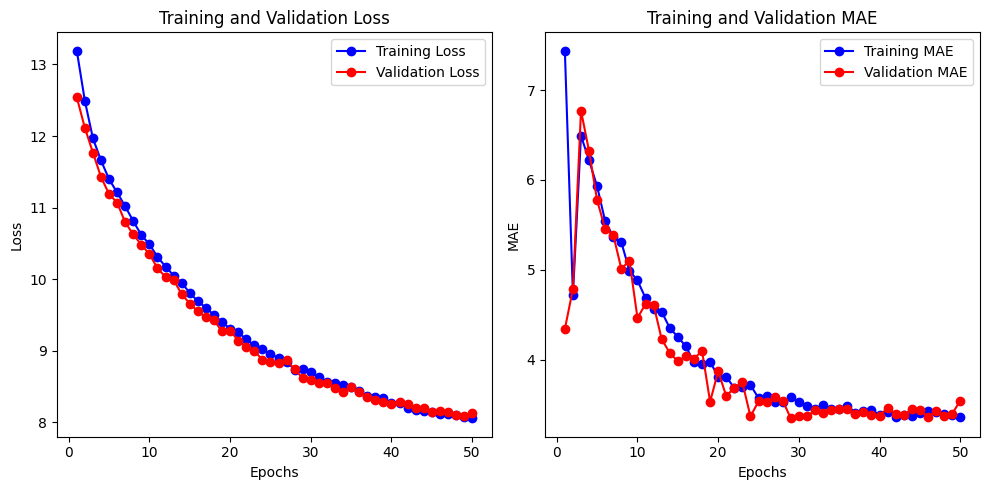

In [19]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error_labels']
val_mae = history.history['val_mean_absolute_error_labels']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, mae, 'bo-', label='Training MAE')
plt.plot(epochs, val_mae, 'ro-', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()